<a href="https://colab.research.google.com/github/nitinware/GoogleCloabNotebooks/blob/master/coursera/Intro_TF/Course2_Week2_Example_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

--2020-12-22 03:18:55--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.9.208, 172.217.12.240, 172.217.15.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.9.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   140MB/s    in 0.5s    

2020-12-22 03:18:55 (140 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

In [ ]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255
    )
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 16s - loss: 0.6865 - accuracy: 0.5625 - val_loss: 0.6871 - val_accuracy: 0.5030
Epoch 2/100
100/100 - 8s - loss: 0.6604 - accuracy: 0.6110 - val_loss: 0.6452 - val_accuracy: 0.6410
Epoch 3/100
100/100 - 8s - loss: 0.6170 - accuracy: 0.6640 - val_loss: 0.5923 - val_accuracy: 0.6900
Epoch 4/100
100/100 - 8s - loss: 0.5792 - accuracy: 0.6810 - val_loss: 0.5797 - val_accuracy: 0.7000
Epoch 5/100
100/100 - 8s - loss: 0.5429 - accuracy: 0.7245 - val_loss: 0.5665 - val_accuracy: 0.7060
Epoch 6/100
100/100 - 8s - loss: 0.5225 - accuracy: 0.7370 - val_loss: 0.5467 - val_accuracy: 0.7230
Epoch 7/100
100/100 - 8s - loss: 0.4921 - accuracy: 0.7710 - val_loss: 0.5745 - val_accuracy: 0.6930
Epoch 8/100
100/100 - 8s - loss: 0.4733 - accuracy: 0.7725 - val_loss: 0.5869 - val_accuracy: 0.7000
Epoch 9/100
100/100 - 8s - loss: 0.4442 - accuracy: 0.7965 - val_loss: 0.5312 - val_accuracy: 0.7240
Epoch 10/100
100/100 - 8s - loss: 0.4324 - accuracy: 0.7945 - val_loss: 0.5241 - val_accur

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(len(acc))

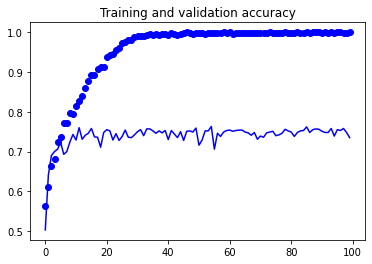

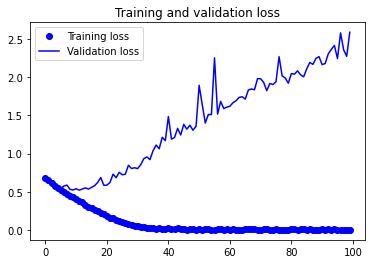

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()